<h1 align="center">Student Score Dataset</h1> 

<h1 align="center">Linear Regression | GRIP Task 1 | Jan21 | DataScience</h1> 


### Author: Preet Mehta


## Table of Contents

1. What is Linear Regression
2. Hypothesis of Linear Regression
3. Understanding Maths behind Linear regression
4. Gradient descent & Cost function

### Predicting dependent variable (y) and R squared from scratch 
6. Training a Linear Regression model
7. Evaluating the model
8. scikit-learn implementation
9. Stochastic Gradient Descent (SGDRegressor)


## Step 1: What is Linear regression?  

<h4 align="left"></h4> 
- Somethinng you know right from your school days
<img src ="https://miro.medium.com/max/361/1*nejpuvlh1MbMGQtve_1ztQ.png", width="200px">
- Our Goal: To find the best fit line
<img src ="https://miro.medium.com/max/2400/1*2VBMHbTdBI4cNozHhpTa0Q.png", width="500px", align='center'>
<h4 align="left">Methods to find the coefficient: </h4> 

- Ordinary Least Mean Square Method
- Gradient Descent approach

Here, we will be implementing Gradient Descent approach





## Step 2: Hypothesis of Linear Regression

The linear regression model can be represented by the following equation:

<img src ="https://miro.medium.com/max/313/1*A32yDrkQKIU0Z-Nf7JD9Pg.png">

- Y is the predicted value
- θ₀ is the bias term.
- θ₁,…,θₙ are the model parameters
- x₁, x₂,…,xₙ are the feature values.

## Step 3: Understanding Maths behind Linear regression


<img src= "https://miro.medium.com/max/570/1*2zsXR1bjDs3fQ4MOxbmehg.png">

<h4 align="left">SSE: Sum of Squares Errors (RSS: Residual sum of squares or Residual error or or unexplained variability)</h4> 
<img src= "https://miro.medium.com/max/235/1*WmyUp5prG2V72UuGMakBzg.png">
<h4 align="left">SSR: Sum of Squares Regression (ESS: Explained sum of squares or Regression Error or Explained variability)</h4> 
<img src= "https://miro.medium.com/max/236/1*V17CDOVyjDcAuOnW5p2QGw.png">
<h4 align="left">SST: Sum of Squares Total (SST = SSR + SSE)</h4> 
<h4 align="left">TSS: Total sum of squares (TSS = ESS + RSS)</h4> 
<img src= "https://miro.medium.com/max/261/1*btPemyKR9EQDUN6O8o_ejw.png">

<h4 align="left">R² score or the coefficient of determination explains how much the total variance of the dependent variable can be reduced by using the least square regression</h4> 
<img src= "https://miro.medium.com/max/318/1*eebOVNcNlkwqM-fWjzmOLg.gif", width="200px">
<img src= "https://miro.medium.com/max/128/1*dUAJL0vVJw7gfb5cq3eluA.png", width="200px">

## Step 4: Gradient descent & Cost function

### Gradient Descent
- Gradient is one optimization method which can be used to optimize the Residual sum of squares cost function. 
- There can be other cost functions. Basically it starts with an initial value of β0 and β1 and then finds the cost function. 
- It then increases or decreases the parameters to find the next cost function value. 
- This is done till a minima is found. 
- Gradient descent expects that there is no local minimal and the graph of the cost function is convex.
Mathematics of gradient descent: https://www.youtube.com/watch?v=jc2IthslyzM
<h4 align="left"></h4> 
<img src= "https://editor.analyticsvidhya.com/uploads/63238GD_2params.jpg", width="700px">
<img src= "https://i.stack.imgur.com/3MhPr.png", width="700px">


<h4 align="center"></h4> 
<img src ="https://editor.analyticsvidhya.com/uploads/27669loss%20function5.jpg", width="800px">
<h5 align="center">Note: (i) in the equation represents the ith training example, not the power.</h5> 

<h4 align="center">Let's do this</h4> 
<img src ="https://miro.medium.com/max/750/1*d3W4j-j-HiN5O8OOBshgrA.gif", width="400px">

## Step 6: Training a Linear Regression model

In [3]:
import numpy as np
import pandas as pd

In [4]:
z=pd.read_csv("Studentscorev1.csv")
x=z.Hours
y=z.Scores
n=len(x)

In [5]:
z

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [6]:
## Now lets define cost function
#y=theta1.x+theta0

In [7]:
# def cost_function(theta1):
#     x=z.Hours
#     y=z.Scores
#     n=len(x)
#     sum_of_error=[]
#     for i in range(n):
#         x.theta1=x[i]*theta1
#         error=x.theta1-y[i]
#         error_square=error*error
#         sum_of_error.append(error_square)
#     j=(0.5*sum(sum_of_error))/n
        
#     return j
    

In [8]:
#Defining Gradient descent:
def gradient_descent1(alpha,iters):
    x=z.Hours
    y=z.Scores
    n=len(x)
    theta0=0
    theta1=0
    
    for h in range(iters):
        d_theta1=[]
        d_theta0=[]   
        for i in range(n):
            d_theta0.append(theta0+theta1*x[i]-y[i])
            d_theta1.append((theta0+theta1*x[i]-y[i])*x[i])
            

        theta1=theta1-alpha*sum(d_theta1)*(1/n)
        theta0=theta0-alpha*sum(d_theta0)*(1/n)

    return theta1,theta0

In [9]:
# Defining R square function:
def R_square():
    import statistics
    SSE=[]
    SST=[]
    RMSE=[]
    n=len(z.Hours)
    for i in range(n):
        e=(predict(x[i])-z.Scores[i])**2
        t=(y[i]-statistics.mean(z.Scores))**2
        u=(predict(x[i])-y[i])**2
        SSE.append(e)
        SST.append(t)
        RMSE.append(u)
        

        R_square=1-((sum(SSE))/(sum(SST)))
    return R_square*100

In [10]:
theta1,theta0=gradient_descent1(0.01,1000)

## Step 7: Evaluating the model
- Till now we have implemented linear regression from scratch and used gradient descent to find the model parameters. 
- But how good is our model? 
- We need some measure to calculate the accuracy of our model. 
- Let’s look at various metrics to evaluate the model we built above.

### Evaluating the performance of the model
- We will be using Root mean squared error(RMSE) and Coefficient of Determination(R² score) to evaluate our model.

In [11]:
#Defining prediction function
def predict(x):
    return theta0+theta1*x
predict(9.25), R_square()

(92.97420126293007, 95.29427607939829)

In [12]:
#comparing actual and predicted values of 'y'
y_pred=[]
for i in range(n):
    print(y[i],predict(x[i]))
    y_pred.append(predict(x[i]))

21 26.84534713232546
47 52.31720205670649
27 33.70315422735112
75 85.626550803974
30 36.64221441093355
20 17.04847985371737
88 92.48435789899966
60 56.23594896814973
81 83.66717734825238
25 28.80472058804708
85 77.78905698108753
62 60.154695879592964
41 46.43908168954164
42 34.68284095521193
17 13.129732942274133
95 89.54529771541723
30 26.84534713232546
24 20.967226765160607
67 62.11406933531458
69 74.8499967975051
30 28.80472058804708
54 49.378141873124065
35 39.581274594515975
76 69.95156315820105
86 78.76874370894834


In [13]:
#calculating r squared by sklearn
from sklearn.metrics import r2_score
y_true = z.Scores
r2_score(y_true, y_pred)

0.9529427607939829

## Step 8: Scikit-learn implementation

In [14]:
# Importing all libraries required in this notebook
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  
%matplotlib inline
import seaborn as sns

In [15]:
# Reading data from remote link
url = "http://bit.ly/w-data"
s_data = pd.read_csv(url)
print("Data imported successfully")

s_data

Data imported successfully


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


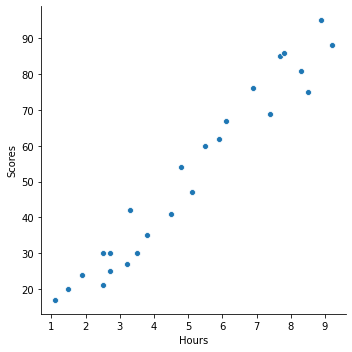

In [16]:
# scatter plot
sns.relplot(x="Hours", y="Scores", data=s_data, kind="scatter");

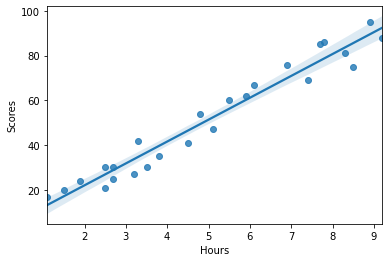

In [17]:
sns.regplot(x="Hours", y="Scores", data=s_data)

In [18]:
#Selecting the columns from data frame
#  If you say df.iloc[:, -1] it means the last column, but df.iloc[:, :-1] means until the last column.
X = z.iloc[:, :-1].values 
Y = z.iloc[:, 1].values  #last column

In [19]:
#You can also use this
# X=z.Hours
# Y=z.Scores

In [20]:
from sklearn.model_selection import train_test_split  
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2, random_state=0)

# Training the algorithm

In [21]:
from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()  
regressor.fit(X_train, Y_train) 

print("Training complete.")

Training complete.


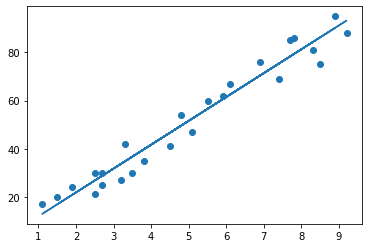

In [22]:
# Plotting the regression line
line = regressor.coef_*X+regressor.intercept_

# Plotting for the test data
plt.scatter(X, Y)
plt.plot(X, line);
plt.show()


## **Making Predictions**
Now that we have trained our algorithm, it's time to make some predictions.

In [23]:
print(X_test) # Testing data - In Hours
Y_pred = regressor.predict(X_test) # Predicting the scores

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [24]:
# Comparing Actual vs Predicted
df = pd.DataFrame({'Actual': Y_test, 'Predicted': Y_pred})  
df 

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [25]:
# You can also test with your own data
hours = np.array([[9.25,]])
own_pred = regressor.predict(hours)
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))

No of Hours = [[9.25]]
Predicted Score = 93.69173248737538


# **Evaluating the model**

The final step is to evaluate the performance of algorithm. This step is particularly important to compare how well different algorithms perform on a particular dataset. For simplicity here, we have chosen the mean square error. There are many such metrics.

In [26]:
from sklearn import metrics  
print('Mean Absolute Error:',metrics.mean_absolute_error(Y_test, Y_pred)) 

Mean Absolute Error: 4.18385989900298


<img src ="https://www.gstatic.com/education/formulas2/-1/en/mean_squared_error.svg">

In [41]:
import sklearn as sk
sk.metrics.mean_squared_error(Y_test, Y_pred, sample_weight=None, multioutput='uniform_average', squared=True)

21.598769307217413

<img src ="https://www.gstatic.com/education/formulas2/-1/en/root_mean_square_deviation.svg">
The root-mean-square deviation (RMSD) or root-mean-square error (RMSE) is a frequently used measure of the differences between values (sample or population values) predicted by a model or an estimator and the values observed

In [39]:
## RMSE = sqrt(mean_squared_error)
np.sqrt(sk.metrics.mean_squared_error(Y_test, Y_pred, sample_weight=None, multioutput='uniform_average', squared=True))

4.647447612100368

In [29]:
#R Squared through sklearn
import sklearn as sk
sk.metrics.r2_score(Y_test, Y_pred,sample_weight=None, multioutput='uniform_average')

0.9454906892105355

In [38]:
#comparing Actual Y and Predicted Y
for i in range(len(Y_test)):
    print (Y_test[i],Y_pred[i])

20 16.884144762398027
27 33.732260779489835
69 75.35701799818723
30 26.794801243040265
62 60.49103327722388


## Step 9: Stochastic Gradient Descent (SGDRegressor)

In [30]:
j=sk.linear_model.SGDRegressor(loss='squared_loss', penalty='l2', alpha=0.001, l1_ratio=0.15, fit_intercept=True, max_iter=1000, tol=0.001, shuffle=True, verbose=0, epsilon=0.1, random_state=None, learning_rate='invscaling', eta0=0.01, power_t=0.25, early_stopping=False, validation_fraction=0.1, n_iter_no_change=5, warm_start=False, average=False)

In [31]:
j.fit(X, Y)

SGDRegressor(alpha=0.001)

In [32]:
predict(9.25)

92.97420126293007

<img src ="https://miro.medium.com/max/400/1*eDCn5xs-BdgSFcmaEHxH-g.jpeg">

### Resources:
- https://www.analyticsvidhya.com/blog/2020/10/linear-regression-for-absolute-beginners-with-implementation-in-python/
- https://medium.com/analytics-vidhya/ordinary-least-squared-ols-regression-90942a2fdad5
- https://towardsdatascience.com/simple-linear-regression-and-ols-introduction-to-the-theory-1b48f7c69867
- https://towardsdatascience.com/understanding-the-ols-method-for-simple-linear-regression-e0a4e8f692cc
- https://towardsdatascience.com/linear-regression-from-scratch-cd0dee067f72
- https://towardsdatascience.com/linear-regression-using-python-b136c91bf0a2 #(IMP)
- https://towardsdatascience.com/linear-regression-simplified-ordinary-least-square-vs-gradient-descent-48145de2cf76
- https://medium.com/edureka/least-square-regression-40b59cca8ea7
- https://medium.com/analytics-vidhya/ordinary-least-square-ols-method-for-linear-regression-ef8ca10aadfc
- https://www.analyticsvidhya.com/blog/2020/10/linear-regression-for-absolute-beginners-with-implementation-in-python/
- https://gist.github.com/felipessalvatore/c2e1c09dfcb8710b847e2457620f8204
- https://medium.com/@harishreddyp98/linear-regression-in-python-c164149b93ab
- https://towardsdatascience.com/predicting-house-prices-with-linear-regression-machine-learning-from-scratch-part-ii-47a0238aeac1
- https://towardsdatascience.com/understanding-the-ols-method-for-simple-linear-regression-e0a4e8f692cc
- https://towardsdatascience.com/linear-regression-in-python-a4cfbab72c17
- https://medium.com/ml-ai-study-group/linear-regression-403a11f1ece2

c:\users\preetmehta\appdata\local\programs\python\python38-32\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.datasets.samples_generator module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)


Gradient Descent: -3.73, 82.80 73
Least Squares: -3.71, 82.90


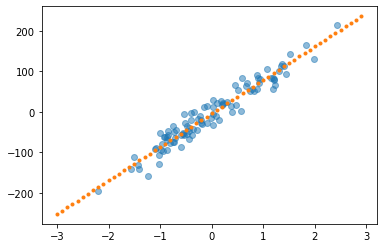

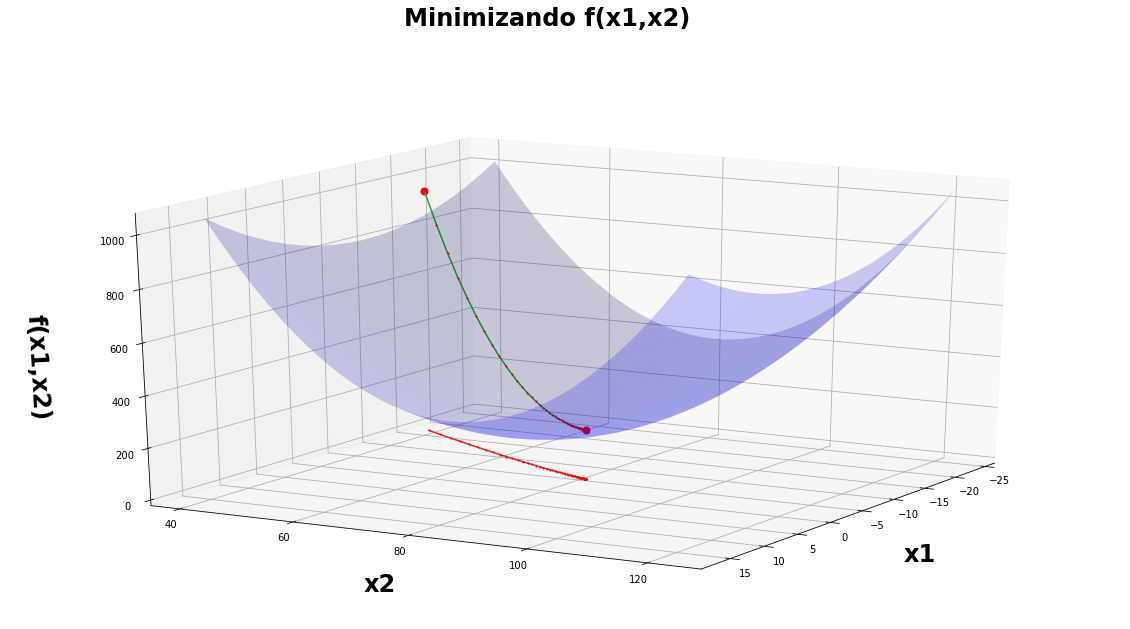

In [112]:
#code adapted from http://tillbergmann.com/blog/python-gradient-descent.html

%matplotlib inline
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from scipy import stats 

from sklearn.datasets.samples_generator import make_regression 



x, y = make_regression(n_samples = 100, 
                       n_features=1, 
                       n_informative=1, 
                       noise=20,
                       random_state=2017)
x = x.flatten()
slope, intercept, _,_,_ = stats.linregress(x,y)
best_fit = np.vectorize(lambda x: x * slope + intercept)
plt.plot(x,y, 'o', alpha=0.5)
grid = np.arange(-3,3,0.1)
plt.plot(grid,best_fit(grid), '.')

def gradient_descent(x, y, theta_init, step=0.001, maxsteps=0, precision=0.001, ):
    costs = []
    m = y.size # number of data points
    theta = theta_init
    history = [] # to store all thetas
    preds = []
    counter = 0
    oldcost = 0
    pred = np.dot(x, theta)
    error = pred - y 
    currentcost = np.sum(error ** 2) / (2 * m)
    preds.append(pred)
    costs.append(currentcost)
    history.append(theta)
    counter+=1
    while abs(currentcost - oldcost) > precision:
        oldcost=currentcost
        gradient = x.T.dot(error)/m 
        theta = theta - step * gradient  # update
        history.append(theta)
        
        pred = np.dot(x, theta)
        error = pred - y 
        currentcost = np.sum(error ** 2) / (2 * m)
        costs.append(currentcost)
        
        if counter % 25 == 0: preds.append(pred)
        counter+=1
        if maxsteps:
            if counter == maxsteps:
                break
        
    return history, costs, preds, counter
xaug = np.c_[np.ones(x.shape[0]), x]
theta_i = [-15, 40] + np.random.rand(2)
history, cost, preds, iters = gradient_descent(xaug, y, theta_i, step=0.1)
theta = history[-1]
print("Gradient Descent: {:.2f}, {:.2f} {:d}".format(theta[0], theta[1], iters))
print("Least Squares: {:.2f}, {:.2f}".format(intercept, slope))


from mpl_toolkits.mplot3d import Axes3D

def error(X, Y, THETA):
    return np.sum((X.dot(THETA) - Y)**2)/(2*Y.size)

ms = np.linspace(theta[0] - 20 , theta[0] + 20, 20)
bs = np.linspace(theta[1] - 40 , theta[1] + 40, 40)

M, B = np.meshgrid(ms, bs)

zs = np.array([error(xaug, y, theta) 
               for theta in zip(np.ravel(M), np.ravel(B))])
Z = zs.reshape(M.shape)

fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot(111, projection='3d')

ax.plot_surface(M, B, Z, rstride=1, cstride=1, color='b', alpha=0.2)
#ax.contour(M, B, Z, 20, color='b', alpha=0.5, offset=0, stride=30)


ax.set_xlabel('x1', labelpad=30, fontsize=24, fontweight='bold')
ax.set_ylabel('x2', labelpad=30, fontsize=24, fontweight='bold')
ax.set_zlabel('f(x1,x2)', labelpad=30, fontsize=24, fontweight='bold')
ax.view_init(elev=20., azim=30)
ax.plot([theta[0]], [theta[1]], [cost[-1]] , markerfacecolor='r', markeredgecolor='r', marker='o', markersize=7)
ax.plot([history[0][0]], [history[0][1]], [cost[0]] , markerfacecolor='r', markeredgecolor='r', marker='o', markersize=7)


ax.plot([t[0] for t in history], [t[1] for t in history], cost , markerfacecolor='r', markeredgecolor='r', marker='.', markersize=2)
ax.plot([t[0] for t in history], [t[1] for t in history], 0 , markerfacecolor='r', markeredgecolor='r', marker='.', markersize=2)

fig.suptitle("Minimizando f(x1,x2)", fontsize=24, fontweight='bold')
plt.savefig("Minimization_image.png")